In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config.api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"
outPathBase = 'output/'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [36]:
temps = []
humidities = []
cloudinessess = []
windSpeeds = []
cityLats = []
cityLngs = []
dates = []
countries = []
names = []

In [37]:
print('Beginning Data Retrieval')
print('--------------------------------------')
for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response = requests.get(url).json()
    print(f'Attempting to save data for {city} :')
    try:
        names.append(response['name'])
        temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudinessess.append(response['clouds']['all'])
        windSpeeds.append(response['wind']['speed'])
        cityLats.append(response['coord']['lat'])
        cityLngs.append(response['coord']['lon'])
        dates.append(response['dt'])
        countries.append(response['sys']['country'])
    except KeyError:
        print(f'failed to find all info for {city}, skipping')
    
print('--------------------------------------')
print('Data Retrieval Complete')
print('--------------------------------------')

Beginning Data Retrieval
--------------------------------------
Attempting to save data for anadyr :
Attempting to save data for carnarvon :
Attempting to save data for saldanha :
Attempting to save data for codrington :
Attempting to save data for rikitea :
Attempting to save data for mahebourg :
Attempting to save data for cape town :
Attempting to save data for kavaratti :
Attempting to save data for chokurdakh :
Attempting to save data for vadum :
Attempting to save data for ushuaia :
Attempting to save data for labutta :
failed to find all info for labutta, skipping
Attempting to save data for nizhniye vyazovyye :
Attempting to save data for barentsburg :
failed to find all info for barentsburg, skipping
Attempting to save data for velikooktyabrskiy :
Attempting to save data for taolanaro :
failed to find all info for taolanaro, skipping
Attempting to save data for saint george :
Attempting to save data for ola :
Attempting to save data for terrace :
Attempting to save data for bo

In [90]:
base_df_dict = {
    'City' : names,
    'Cloudiness' : cloudinessess,
    'Country' : countries,
    'Date' : dates,
    'Humidity' : humidities,
    'Lat' : cityLats,
    'Lng' : cityLngs,
    'Max Temp' : temps,
    'Wind Speed' : windSpeeds}

base_df = pd.DataFrame(base_df_dict)
base_df.to_csv(output_data_file)

In [43]:
lat_sorted_df = base_df.sort_values('Lat')
lat_sorted_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
10,Ushuaia,75,AR,1587162150,32,-54.80,-68.30,53.60,9.17
58,Punta Arenas,66,CL,1587161990,71,-53.15,-70.92,50.00,4.70
354,Río Gallegos,0,AR,1587162200,47,-51.62,-69.22,55.40,18.34
122,Bluff,78,NZ,1587162164,93,-46.60,168.33,52.00,5.99
83,Kaitangata,100,NZ,1587162159,86,-46.28,169.85,53.01,21.99
...,...,...,...,...,...,...,...,...,...
169,Khatanga,0,RU,1587162041,91,71.97,102.50,6.31,12.17
42,Upernavik,0,GL,1587162154,90,72.79,-56.15,24.67,2.24
375,Dikson,2,RU,1587162203,92,73.51,80.55,9.55,8.34
110,Qaanaaq,0,GL,1587162163,85,77.48,-69.36,17.87,0.72


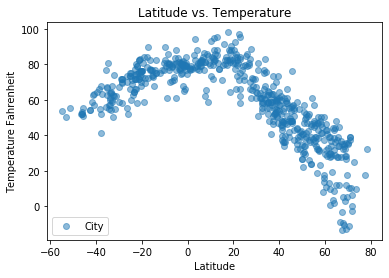

In [52]:
plt.close()
path = 
x_vals = lat_sorted_df['Lat']
y_vals = lat_sorted_df['Max Temp']
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature Fahrenheit')
plt.title('Latitude vs. Temperature')
plt.legend(labels=['City'], loc='lower left')
plt.savefig()
plt.show()

#### Latitude vs. Humidity Plot

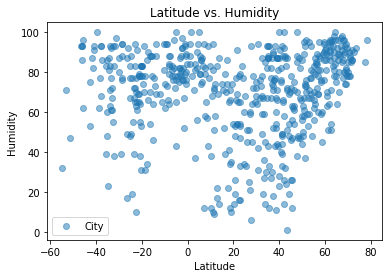

In [53]:
plt.close()
x_vals = lat_sorted_df['Lat']
y_vals = lat_sorted_df['Humidity']
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.legend(labels=['City'], loc='lower left')

plt.show()

#### Latitude vs. Cloudiness Plot

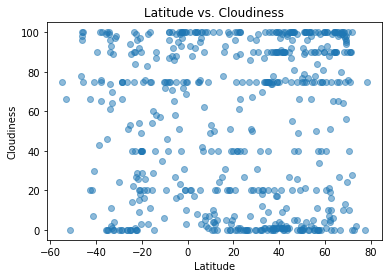

In [62]:
plt.close()
x_vals = lat_sorted_df['Lat']
y_vals = lat_sorted_df['Cloudiness']
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
# plt.legend(labels=['City'], loc='best')

plt.show()

#### Latitude vs. Wind Speed Plot

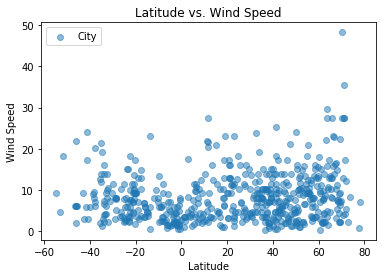

In [57]:
plt.close()
x_vals = lat_sorted_df['Lat']
y_vals = lat_sorted_df['Wind Speed']
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.legend(labels=['City'], loc='upper left')

plt.show()

In [ ]:
plt.close()
x_vals = lat_sorted_df['Lat']
y_vals = lat_sorted_df['Wind Speed']
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.legend(labels=['City'], loc='upper left')

plt.show()

In [94]:
def linRegresPlt(x_vals, y_vals, labels=['title' , 'y']):
#     x_vals = df['']
#     y_vals = df['']
#     labels = ['title' , 'y']
    
    savePath = outPathBase + labels[0] + '.png'
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    print(f"The r-squared is: {rvalue}")
    
    plt.close()
    plt.scatter(x_vals, y_vals, alpha=0.5)
    plt.xlabel('Latitude')
    plt.ylabel(labels[1])
    plt.title(labels[0])
    plt.plot(x_vals, regress_values, "r-")
    plt.legend(labels=['Correlation line', 'City'], loc='best')
    plt.savefig(savePath)

    plt.show()

In [77]:
# Create Northern and Southern Hemisphere DataFrames
# north = lat >= 0
# south = lat < 0 

df_hems_base = lat_sorted_df.copy()
df_hems_base['Lat'] = df_hems_base['Lat'].astype(float)

north_df = df_hems_base.loc[df_hems_base['Lat'] >= 0].copy()
south_df = df_hems_base.loc[df_hems_base['Lat'] < 0].copy()

In [78]:
# north vars
nhLat = north_df['Lat']
nhMaxT = north_df['Max Temp']
nhHum = north_df['Humidity']
nhClo = north_df['Cloudiness']
nhWin = north_df['Wind Speed']

# south vars
shLat = south_df['Lat']
shMaxT = south_df['Max Temp']
shHum = south_df['Humidity']
shClo = south_df['Cloudiness']
shWin = south_df['Wind Speed']

y = -1.05x + 95.63
The r-squared is: -0.874824563961902


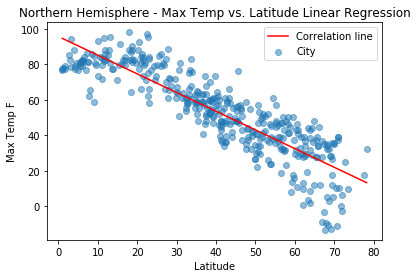

In [96]:
labels = ['Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp F']
linRegresPlt(x_vals=nhLat, labels=labels, y_vals=nhMaxT)

y = 0.54x + 82.08
The r-squared is: 0.738601161003145


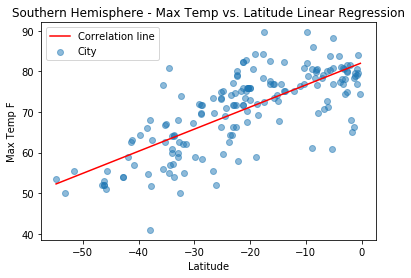

In [97]:
labels = ['Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp F']
linRegresPlt(x_vals=shLat, labels=labels, y_vals=shMaxT)

y = 0.36x + 53.28
The r-squared is: 0.3066397009489186


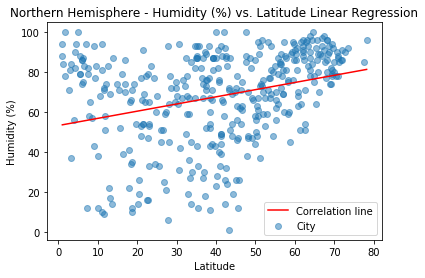

In [98]:
labels = ['Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 'Humidity (%)']
linRegresPlt(x_vals=nhLat, labels=labels, y_vals=nhHum)

y = 0.17x + 77.7
The r-squared is: 0.12882289557760557


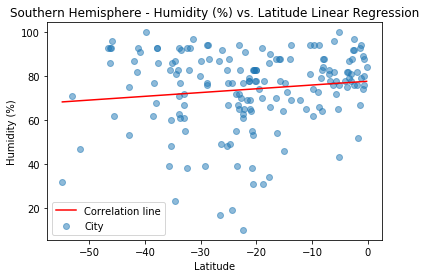

In [99]:
labels = ['Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 'Humidity (%)']
linRegresPlt(x_vals=shLat, labels=labels, y_vals=shHum)

y = 0.29x + 41.05
The r-squared is: 0.14297189866179136


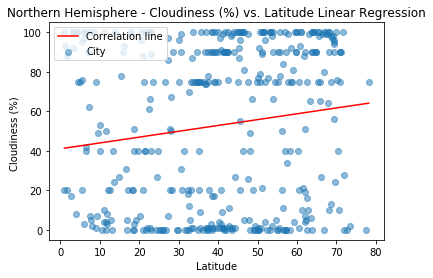

In [100]:
labels = ['Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 'Cloudiness (%) ']
linRegresPlt(x_vals=nhLat, labels=labels, y_vals=nhClo)

y = 0.26x + 61.13
The r-squared is: 0.09812645334116663


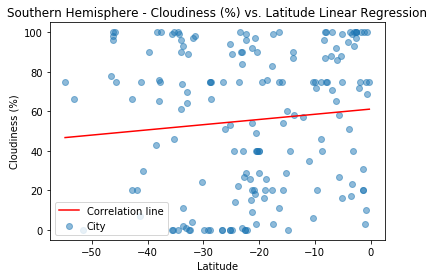

In [101]:
labels = ['Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 'Cloudiness (%)']
linRegresPlt(x_vals=shLat, labels=labels, y_vals=shClo)

y = 0.05x + 6.6
The r-squared is: 0.16325640639592634


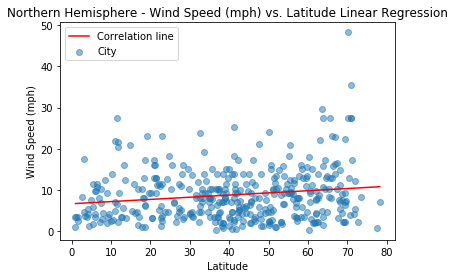

In [102]:
labels = ['Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 'Wind Speed (mph)']
linRegresPlt(x_vals=nhLat, labels=labels, y_vals=nhWin)

y = -0.14x + 3.99
The r-squared is: -0.38072665466404504


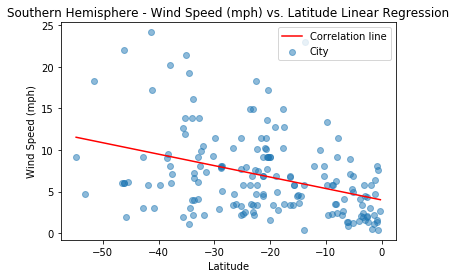

In [103]:
labels = ['Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 'Wind Speed (mph)']
linRegresPlt(x_vals=shLat, labels=labels, y_vals=shWin)